# USAD

## Environment

In [ ]:
from utils import *
from usad_tf import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

tf.enable_eager_execution()

## EDA - Data Pre-Processing

### Normal period

In [6]:
data_path = "C:\\Users\\PC0\\Documents\\GitHub\\datasets\\"

#Read data
data_1 = pd.read_csv(data_path + "Bearing1_1.csv")
data_3 = pd.read_csv(data_path + "Bearing1_3.csv")

print(data_1.shape,data_3.shape)

(2778, 2) (2353, 2)


#### Normalization

## Training

In [9]:
windows_normal, windows_normal_train, windows_normal_test, w_size, z_size = preproc(data_1)

In [11]:
train_loader = Dataloader(windows_normal_train_re,windows_normal_train_re,BATCH_SIZE)
test_loader = Dataloader(windows_normal_test_re,windows_normal_test_re,BATCH_SIZE)

* USAD tensorflow

In [15]:
model_usad = UsadModel(w_size, z_size)
model_usad.training(train_loader, test_loader, N_EPOCHS)

Epoch [1], val_loss1: 0.2132, val_loss2: 0.2134
Epoch [2], val_loss1: 0.2076, val_loss2: 0.2071
Epoch [3], val_loss1: 0.1920, val_loss2: 0.1902
Epoch [4], val_loss1: 0.1593, val_loss2: 0.1564
Epoch [5], val_loss1: 0.1214, val_loss2: 0.1202
Epoch [6], val_loss1: 0.0780, val_loss2: 0.0792
Epoch [7], val_loss1: 0.0412, val_loss2: 0.0431
Epoch [8], val_loss1: 0.0195, val_loss2: 0.0207
Epoch [9], val_loss1: 0.0084, val_loss2: 0.0087
Epoch [10], val_loss1: 0.0057, val_loss2: 0.0055
Epoch [11], val_loss1: 0.0054, val_loss2: 0.0053
Epoch [12], val_loss1: 0.0054, val_loss2: 0.0054
Epoch [13], val_loss1: 0.0054, val_loss2: 0.0054
Epoch [14], val_loss1: 0.0055, val_loss2: 0.0055
Epoch [15], val_loss1: 0.0055, val_loss2: 0.0055
Epoch [16], val_loss1: 0.0056, val_loss2: 0.0056
Epoch [17], val_loss1: 0.0056, val_loss2: 0.0056
Epoch [18], val_loss1: 0.0057, val_loss2: 0.0057
Epoch [19], val_loss1: 0.0057, val_loss2: 0.0057
Epoch [20], val_loss1: 0.0057, val_loss2: 0.0057
Epoch [21], val_loss1: 0.0057

In [16]:
results = model_usad.testing(test_loader)

In [17]:
y_pred = np.concatenate([np.stack(results[:-1]).flatten(), results[-1].flatten()])
#y_test = np.concatenate([np.zeros(windows_normal_test.shape[0]),np.ones(windows_attack.shape[0])])

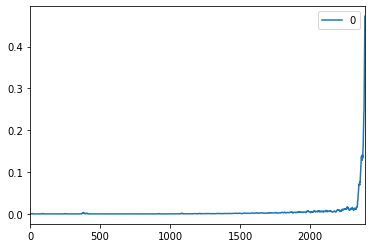

In [20]:
pd.DataFrame(y_pred).plot()

## Anomaly gap maximize net

* 제안 아이디어 검증

In [22]:
usad_agm = UsadModel_AGM(w_size,z_size)

In [23]:
usad_agm.training(train_loader, test_loader, N_EPOCHS)

Epoch [1], val_loss1: 0.2063, val_loss2: 0.2080, val_loss2: -0.0068
Epoch [2], val_loss1: 0.1681, val_loss2: 0.1669, val_loss2: -0.0303
Epoch [3], val_loss1: 0.1154, val_loss2: 0.1174, val_loss2: -0.0316
Epoch [4], val_loss1: 0.0613, val_loss2: 0.0685, val_loss2: -0.0410
Epoch [5], val_loss1: 0.0339, val_loss2: 0.0393, val_loss2: -0.0280
Epoch [6], val_loss1: 0.0178, val_loss2: 0.0203, val_loss2: -0.0255
Epoch [7], val_loss1: 0.0085, val_loss2: 0.0092, val_loss2: -0.0311
Epoch [8], val_loss1: 0.0063, val_loss2: 0.0062, val_loss2: -0.0376
Epoch [9], val_loss1: 0.0062, val_loss2: 0.0058, val_loss2: -0.0366
Epoch [10], val_loss1: 0.0062, val_loss2: 0.0057, val_loss2: -0.0337
Epoch [11], val_loss1: 0.0062, val_loss2: 0.0057, val_loss2: -0.0322
Epoch [12], val_loss1: 0.0060, val_loss2: 0.0056, val_loss2: -0.0289
Epoch [13], val_loss1: 0.0058, val_loss2: 0.0053, val_loss2: -0.0252
Epoch [14], val_loss1: 0.0055, val_loss2: 0.0051, val_loss2: -0.0208
Epoch [15], val_loss1: 0.0053, val_loss2: 0

## Testing

In [24]:
results = model_usad.testing(test_loader)

In [25]:
y_pred = np.concatenate([np.stack(results[:-1]).flatten(), results[-1].flatten()])

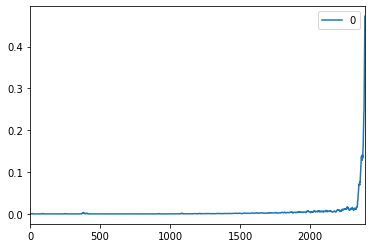

In [26]:
pd.DataFrame(y_pred).plot()